# Prepare Data

In [18]:
import pandas as pd
import requests
import json, os
from datetime import datetime
from dotenv import load_dotenv
load_dotenv()

True

In [19]:

df_original = pd.read_html(os.getenv("WEB_SCRIPY"), encoding='utf-8')
df = df_original[0].iloc[1:, 1:].copy() 
df.columns = df_original[0].iloc[0, 1:]
now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [20]:
df

,retrived_at,province_id,city,state,country,pollution_aqi,polution_main,weather_tp,weather_pr,weather_hu,weather_ws,weather_wd
1,4/24/2023 19:15:27,TH-10,Phra Nakhon,Bangkok,Thailand,88,p2,31,1007,50,7.13,171
2,4/24/2023 19:15:58,TH-11,Bang Phli,Samut Prakan,Thailand,68,p2,33,1007,60,6.17,180
3,4/24/2023 19:16:29,TH-12,Mueang Nonthaburi,Nonthaburi,Thailand,83,p2,31,1008,46,10.29,110
4,4/24/2023 19:17:00,TH-13,Khlong Luang,Pathum Thani,Thailand,83,p2,32,1008,42,10.29,110
5,4/24/2023 19:17:31,TH-14,Ayutthaya,Phra Nakhon Si Ayutthaya,Thailand,157,p2,33,1006,37,5.34,130
...,...,...,...,...,...,...,...,...,...,...,...,...
62,4/25/2023 0:18:33,TH-16,Ban Mi,Lop Buri,Thailand,87,p2,32,1009,53,3.7,232
63,4/25/2023 0:19:04,TH-20,Na Kluea,Chon Buri,Thailand,80,p2,28,1009,69,3.24,174
64,4/25/2023 0:19:34,TH-21,Ban Khai,Rayong,Thailand,46,p2,28,1010,72,2.28,179
65,4/25/2023 0:20:05,TH-50,Chiang Mai,Chiang Mai,Thailand,114,p2,29,1010,54,1.03,0


In [21]:
df.to_csv("./data/"+f'data-scripy-{now}'+".csv",index=False, encoding='utf-8-sig')


# Upload Data

### Function Define

In [22]:
## create package
def sendMetaToCkan(url_ckan, api_key, ckan_meta):
    headers = {
        'content-type': 'application/json',
        'Authorization': api_key,
    }

    url = '{}/api/action/package_create'.format(url_ckan)
    respond = requests.post(url, data=json.dumps(ckan_meta), headers=headers)
    res_text = respond.content.decode('utf-8').replace('\n','br')
    print(res_text)
    
## Upload File
def uploadFileToCkan(url_ckan, api_key, file_meta, path_input):
    headers = {'X-CKAN-API-Key': api_key}
    url = '{}/api/action/resource_create'.format(url_ckan)
    with open(path_input, "rb") as f:
        form_file = {'upload': f}
        respond = requests.post(url, data=file_meta, headers=headers, files=form_file)
        res_text = respond.content.decode('utf-8').replace('\n','br')
        print(res_text)
        print('<b>File has been uploaded</b>')

### Parameter

In [31]:
ckan_meta = json.load(open('metadata.json'))

url_ckan = os.getenv("CKAN_URL")  # ใส่ ip ของ ckan server ตรงนี้
api_key = os.getenv("TOKEN_ADMIN") 

## for upload file
file_meta = {
    'package_id': ckan_meta['name'],
    'name': "exsemple-data",
}
path_input = "./data/"+f'data-scripy-{now}'+".csv"

### Create Dataset

In [32]:
sendMetaToCkan(url_ckan, api_key, ckan_meta)
#{"help": "https://ckan.storemesh.com/api/3/action/help_show?name=package_create", "success": false, "error": {"maintainer": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "update_frequency_unit": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "maintainer_email": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "__type": "Validation Error", "objective": ["\u0e44\u0e21\u0e48\u0e16\u0e39\u0e01\u0e40\u0e25\u0e37\u0e2d\u0e01"], "data_type": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "geo_coverage": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "license_id": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "data_source": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "notes": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "owner_org": ["An organization must be provided", "\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"], "data_format": ["\u0e44\u0e21\u0e48\u0e16\u0e39\u0e01\u0e40\u0e25\u0e37\u0e2d\u0e01"], "data_category": ["\u0e04\u0e48\u0e32\u0e17\u0e35\u0e48\u0e02\u0e32\u0e14\u0e2b\u0e32\u0e22"]}}

{"help": "https://ckan.data.storemesh.com/api/3/action/help_show?name=package_create", "success": true, "result": {"license_title": "License not specified", "maintainer": "Kullanut Padtaku", "relationships_as_object": [], "private": false, "maintainer_email": "kullanat.pad@dome.tu.ac.th", "num_tags": 3, "organization": {"description": "", "created": "2023-04-24T22:58:05.973039", "title": "DSI321", "name": "dsi321", "is_organization": true, "state": "active", "image_url": "", "type": "organization", "id": "a839961e-c141-4094-8a85-7d46b84c10c4", "approval_status": "approved"}, "update_frequency_unit": "\u0e0a\u0e31\u0e48\u0e27\u0e42\u0e21\u0e07", "license_id": "License not specified", "id": "e8a981a3-667b-4a82-b3d0-552a4b73f41a", "metadata_created": "2023-04-24T18:30:50.995554", "metadata_modified": "2023-04-24T18:30:50.995565", "author": null, "author_email": null, "state": "active", "version": null, "update_frequency_interval": "6", "objective": ["\u0e22\u0e38\u0e17\u0e18\u0e28\u0e32\u

### Upload File

In [17]:
uploadFileToCkan(url_ckan, api_key, file_meta, path_input)

{"help": "https://ckan.storemesh.com/api/3/action/help_show?name=resource_create", "success": false, "error": {"message": "\u0e44\u0e21\u0e48\u0e1e\u0e1a", "__type": "Not Found Error"}}
<b>File has been uploaded</b>


In [15]:
! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 1.8 MB/s eta 0:00:0000:0100:01
^C
ERROR: Operation cancelled by user


## Linear Regression

In [ ]:
df = df_original.groupby('year')['gdp'].sum().reset_index()
df

,year,gdp
0,2009,9658668
1,2010,10808139
2,2011,11306909
3,2012,12357343
4,2013,12915155
5,2014,13230301
6,2015,13743459
7,2016,14592594
8,2017,15486552
9,2018,16365575


In [137]:
X = df['year'].values.reshape((10,1))
y = df['gdp'].values.reshape((10,1))


# Train model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

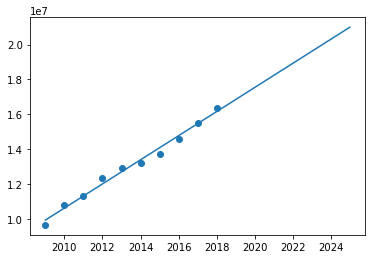

In [138]:
x_new = np.linspace(2009, 2025)
y_new = model.predict(x_new[:, np.newaxis])
plt.scatter(X, y)
plt.plot(x_new, y_new)
plt.show()